# 1. Introduction to MLP

In [14]:
import time
import math
import random

import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt

import torch
import torchvision
from torch import nn
from torch.utils import data
from torchvision import transforms

## Hidden Layers

To deal with **non-linear** data, the easiest way is to **stack multiple fully connected layers** on top of each other:

![](http://d2l.ai/_images/mlp.svg)

The first $L-1$ layers are the **representations** and the final layer is the **linear predictor**. This architecture is called a **`Multilayer Perceptron`** (MLP).

For the above MLP, we have the following **variables** and **parameters**:

- input: $\mathbf{X} \in \mathbb{R}^{n \times d}$
- hidden representations: $\mathbf{H} \in \mathbb{R}^{n \times h}$
- hidden-layer weights: $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$
- hidden-layer bias: $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$
- output layer weights: $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$
- output layer bias: $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$

## Activation Functions

To overcome the limitations of linear model, we need to introduce a non-linear **activation function** $\sigma$ at each hidden unit:

$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

When there are multiple hidden-layers, we have:

$$\mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$$

$$\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$$

### ReLU

The **`Rectified Linear Unit`** (ReLU) function is given as:

**$$\operatorname{ReLU}(x) = \max(x, 0)$$**

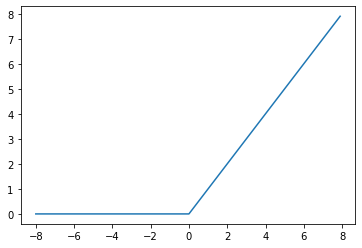

In [8]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)

plt.plot(x.detach(), y.detach())
plt.show()

When the input is 0, the ReLU function is **non-differentiable**. In practice, we can **ignore** such case as the probability of the input being exactly zero is very small.

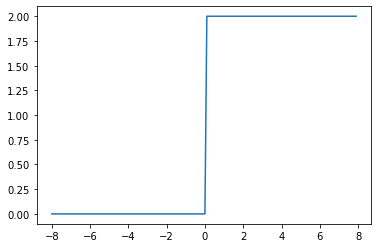

In [10]:
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(), x.grad)
plt.show()

To retrieve some information from **negative values**, we can use the variant of the ReLU function: **Parameterized ReLU** (pReLU)

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x)$$

The above function is also called **Leaky ReLU**.

### Sigmoid

The **`sigmoid`** function transforms its inputs to outputs that lie within the interval (0, 1):

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}$$

Therefore, it is also called the **squashing function**. It is suitable for **binary classification** problems.

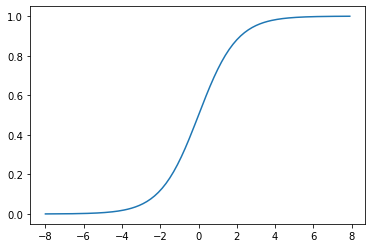

In [11]:
y = torch.sigmoid(x)
plt.plot(x.detach(), y.detach())
plt.show()

The **derivative** of the sigmoid function is given as:

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right)$$

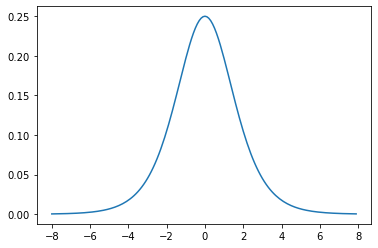

In [16]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(), x.grad)
plt.show()

### Tanh

The **`hyperbolic tangent`** (tanh) function squashes its inputs into outputs within the interval of [-1,1]:

**$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}$$**

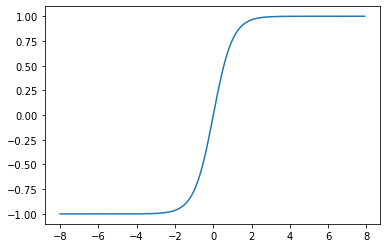

In [17]:
y = torch.tanh(x)
plt.plot(x.detach(), y.detach())
plt.show()

The **derivative** of the tanh function is given as:

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x)$$

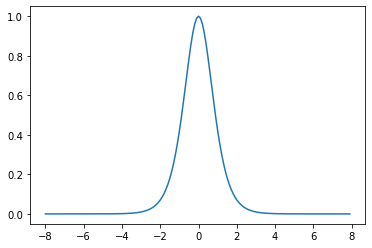

In [18]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(), x.grad)
plt.show()